In [5]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r'C:\Users\Md Shoaib\c tutorials course\Downloads\Breast Cancer METABRIC.csv')

# Display the first few rows
print(df.head())

  Patient ID  Age at Diagnosis Type of Breast Surgery    Cancer Type  \
0    MB-0000             75.65             Mastectomy  Breast Cancer   
1    MB-0002             43.19      Breast Conserving  Breast Cancer   
2    MB-0005             48.87             Mastectomy  Breast Cancer   
3    MB-0006             47.68             Mastectomy  Breast Cancer   
4    MB-0008             76.97             Mastectomy  Breast Cancer   

                        Cancer Type Detailed Cellularity Chemotherapy  \
0           Breast Invasive Ductal Carcinoma         NaN           No   
1           Breast Invasive Ductal Carcinoma        High           No   
2           Breast Invasive Ductal Carcinoma        High          Yes   
3  Breast Mixed Ductal and Lobular Carcinoma    Moderate          Yes   
4  Breast Mixed Ductal and Lobular Carcinoma        High          Yes   

  Pam50 + Claudin-low subtype  Cohort ER status measured by IHC  ...  \
0                 claudin-low     1.0                   

In [6]:
# Get the list of column names and find the number of columns
num_columns = len(df.columns)

print(f"The number of columns is: {num_columns}")


The number of columns is: 34


In [7]:
# Get the first 5 ages from the 'Age' column
first_5_ages = df['Age at Diagnosis'].head(5)

print(first_5_ages)


0    75.65
1    43.19
2    48.87
3    47.68
4    76.97
Name: Age at Diagnosis, dtype: float64


In [8]:
# Get a list of column names
column_names = df.columns.tolist()

print(column_names)


['Patient ID', 'Age at Diagnosis', 'Type of Breast Surgery', 'Cancer Type', 'Cancer Type Detailed', 'Cellularity', 'Chemotherapy', 'Pam50 + Claudin-low subtype', 'Cohort', 'ER status measured by IHC', 'ER Status', 'Neoplasm Histologic Grade', 'HER2 status measured by SNP6', 'HER2 Status', 'Tumor Other Histologic Subtype', 'Hormone Therapy', 'Inferred Menopausal State', 'Integrative Cluster', 'Primary Tumor Laterality', 'Lymph nodes examined positive', 'Mutation Count', 'Nottingham prognostic index', 'Oncotree Code', 'Overall Survival (Months)', 'Overall Survival Status', 'PR Status', 'Radio Therapy', 'Relapse Free Status (Months)', 'Relapse Free Status', 'Sex', '3-Gene classifier subtype', 'Tumor Size', 'Tumor Stage', "Patient's Vital Status"]


In [9]:
# Iterate through the rows and print column names with their corresponding values
for index, row in df.iterrows():
    print(f"Row {index}:")
    for col_name, value in row.items():
        print(f"{col_name}: {value}")
    print()


Row 0:
Patient ID: MB-0000
Age at Diagnosis: 75.65
Type of Breast Surgery: Mastectomy
Cancer Type: Breast Cancer
Cancer Type Detailed: Breast Invasive Ductal Carcinoma
Cellularity: nan
Chemotherapy: No
Pam50 + Claudin-low subtype: claudin-low
Cohort: 1.0
ER status measured by IHC: Positve
ER Status: Positive
Neoplasm Histologic Grade: 3.0
HER2 status measured by SNP6: Neutral
HER2 Status: Negative
Tumor Other Histologic Subtype: Ductal/NST
Hormone Therapy: Yes
Inferred Menopausal State: Post
Integrative Cluster: 4ER+
Primary Tumor Laterality: Right
Lymph nodes examined positive: 10.0
Mutation Count: nan
Nottingham prognostic index: 6.044
Oncotree Code: IDC
Overall Survival (Months): 140.5
Overall Survival Status: Living
PR Status: Negative
Radio Therapy: Yes
Relapse Free Status (Months): 138.65
Relapse Free Status: Not Recurred
Sex: Female
3-Gene classifier subtype: ER-/HER2-
Tumor Size: 22.0
Tumor Stage: 2.0
Patient's Vital Status: Living

Row 1:
Patient ID: MB-0002
Age at Diagnosis: 

Patient ID: MB-5327
Age at Diagnosis: 66.94
Type of Breast Surgery: Breast Conserving
Cancer Type: Breast Cancer
Cancer Type Detailed: Breast Invasive Lobular Carcinoma
Cellularity: High
Chemotherapy: No
Pam50 + Claudin-low subtype: Her2
Cohort: 3.0
ER status measured by IHC: Negative
ER Status: Negative
Neoplasm Histologic Grade: 2.0
HER2 status measured by SNP6: Gain
HER2 Status: Positive
Tumor Other Histologic Subtype: Lobular
Hormone Therapy: Yes
Inferred Menopausal State: Post
Integrative Cluster: 5
Primary Tumor Laterality: Left
Lymph nodes examined positive: 0.0
Mutation Count: 7.0
Nottingham prognostic index: 3.05
Oncotree Code: ILC
Overall Survival (Months): 163.5333333
Overall Survival Status: Living
PR Status: Negative
Radio Therapy: Yes
Relapse Free Status (Months): 161.38
Relapse Free Status: Not Recurred
Sex: Female
3-Gene classifier subtype: HER2+
Tumor Size: 25.0
Tumor Stage: 2.0
Patient's Vital Status: Living

Row 1358:
Patient ID: MB-5328
Age at Diagnosis: 74.57
Type 

In [10]:
# Count NaN values in a specific column, e.g., 'Age'
nan_count = df['Tumor Stage'].isna().sum()

print(f"Number of NaN values in 'Age' column: {nan_count}")


Number of NaN values in 'Age' column: 721


In [11]:
# Remove duplicates and get the first unique value from the 'Age' column
first_age_value = df['Age at Diagnosis'].drop_duplicates().iloc[0]

print(f"The first unique value in 'Age' is: {first_age_value}")


The first unique value in 'Age' is: 75.65


In [12]:
# Split the 'Age' values by comma and keep only the first value
df['Age'] = df['Age at Diagnosis'].apply(lambda x: str(x).split(',')[0])

# Now, get the first 5 rows of 'Age' to verify
print(df['Age'].head())


0    75.65
1    43.19
2    48.87
3    47.68
4    76.97
Name: Age, dtype: object


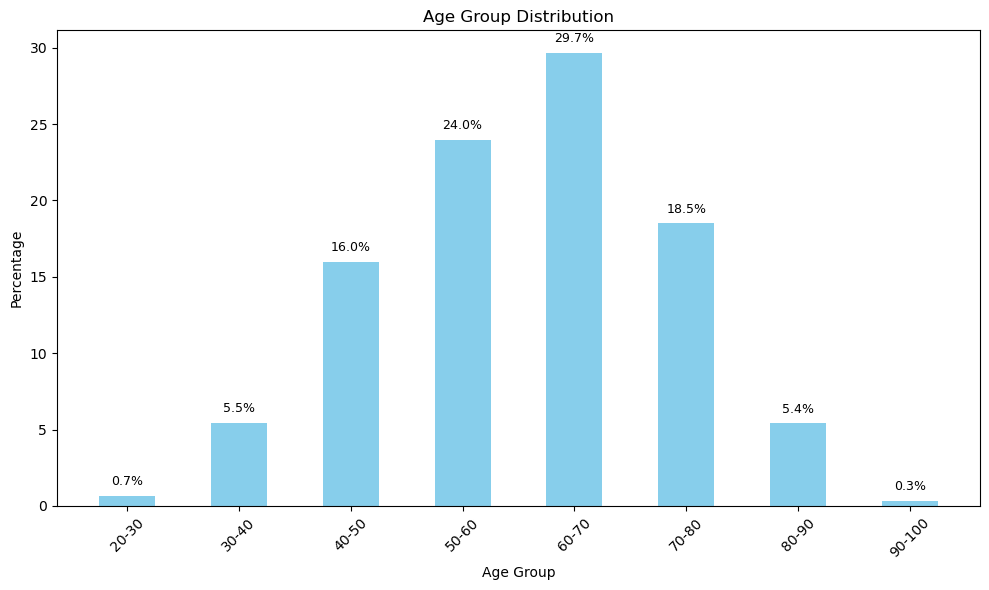

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'Age' to numeric (if it's still string after split)
df['Age at Diagnosis'] = pd.to_numeric(df['Age at Diagnosis'], errors='coerce')

# Drop rows with NaN ages
df = df.dropna(subset=['Age at Diagnosis'])

# Create age bins (20-30, 30-40, ..., up to the max age in your data)
bins = list(range(20, int(df['Age at Diagnosis'].max()) + 10, 10))
labels = [f"{i}-{i+10}" for i in bins[:-1]]
df['AgeGroup'] = pd.cut(df['Age at Diagnosis'], bins=bins, labels=labels, right=False)

# Count values (number of people) in each age group
age_group_counts = df['AgeGroup'].value_counts().sort_index()

# Calculate percentages
total = age_group_counts.sum()
percentages = (age_group_counts / total) * 100

# Plot bar chart with thinner bars (width=0.5)
plt.figure(figsize=(10, 6))
bars = plt.bar(age_group_counts.index.astype(str), percentages, color='skyblue', width=0.5)
plt.title('Age Group Distribution')
plt.ylabel('Percentage')
plt.xlabel('Age Group')
plt.xticks(rotation=45)

# Add percentage text on top of each bar
for bar, pct in zip(bars, percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f'{pct:.1f}%', 
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


C:\Users\Md Shoaib\AppData\Local\Temp\ipykernel_15980\976248869.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['AgeGroup', 'Tumor Stage']).size().unstack(fill_value=0)


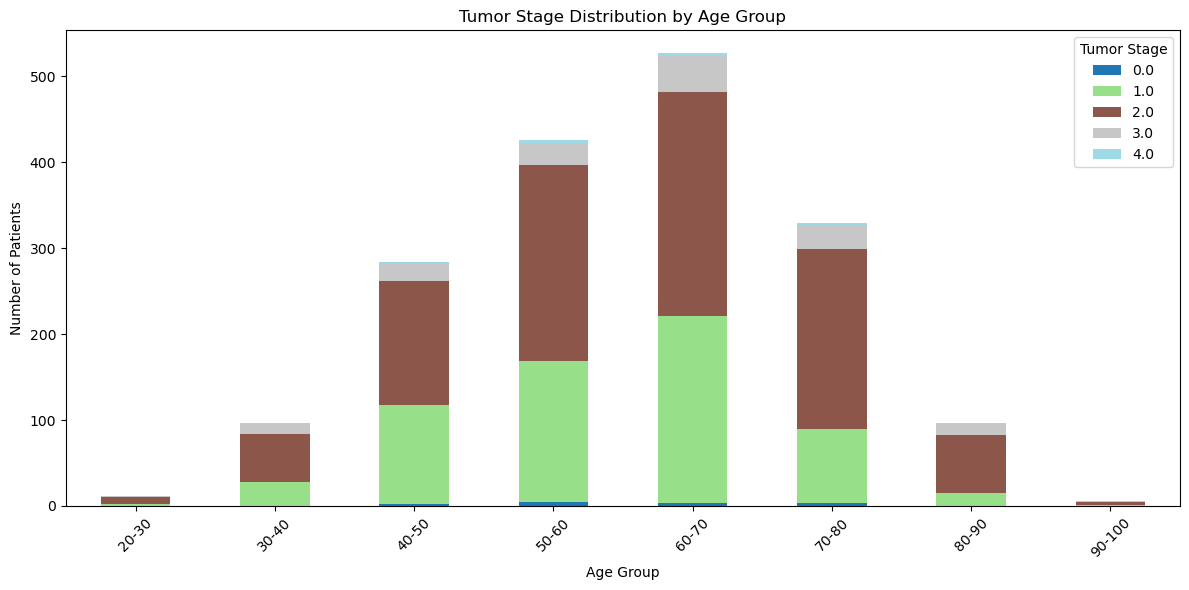

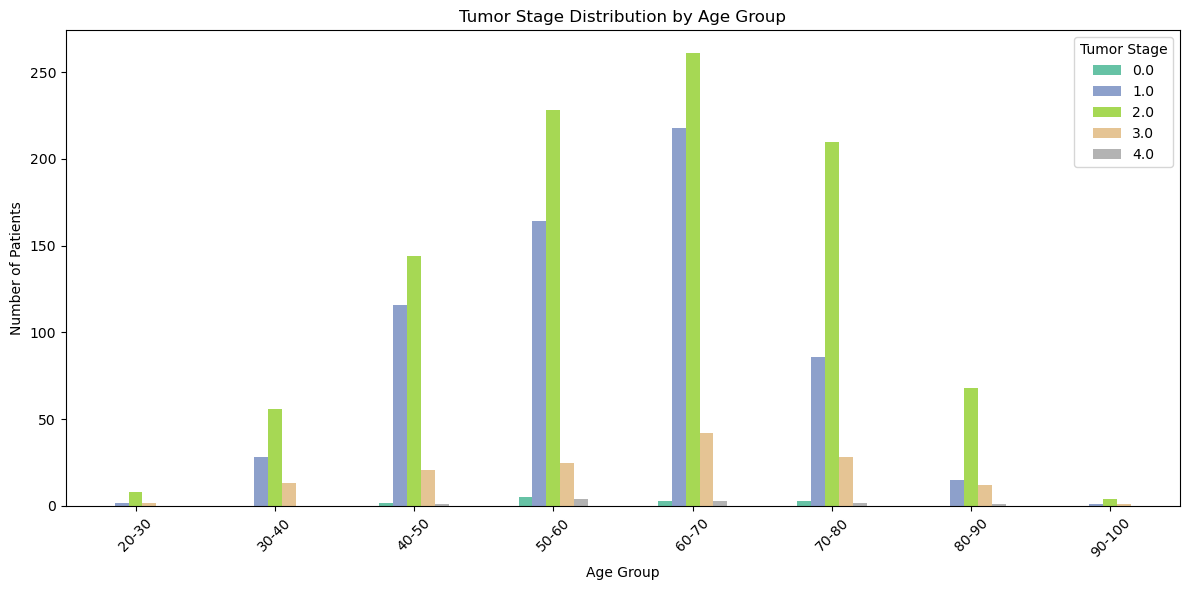

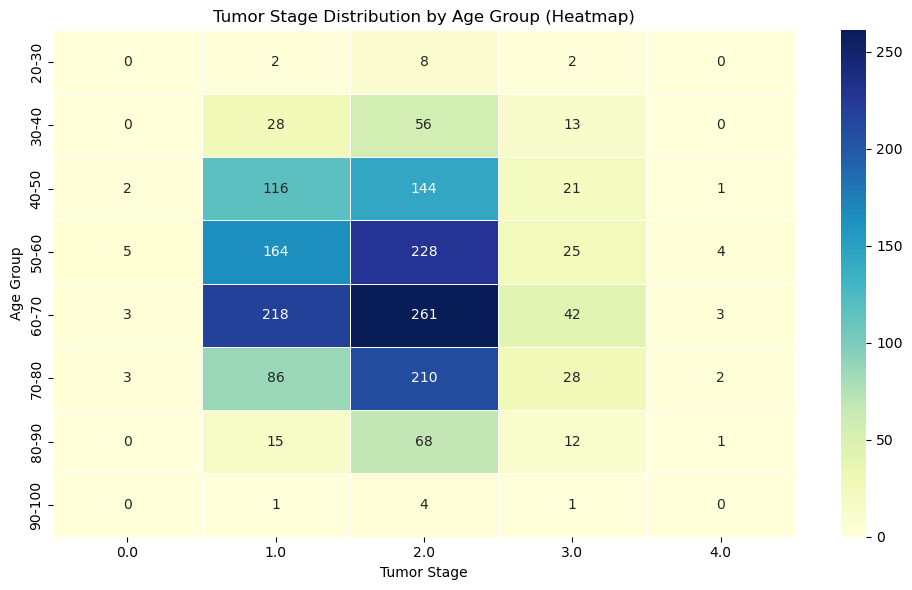

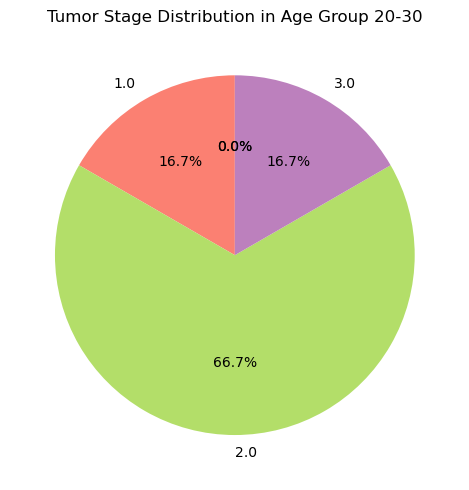

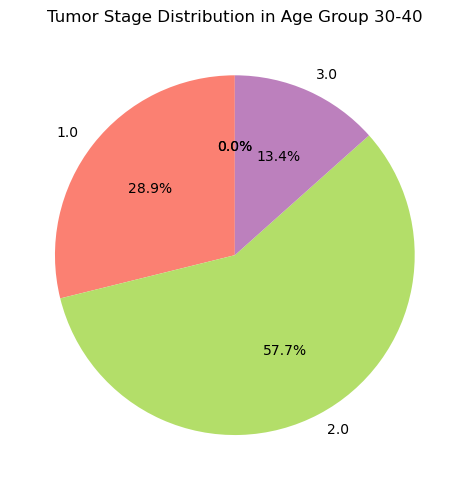

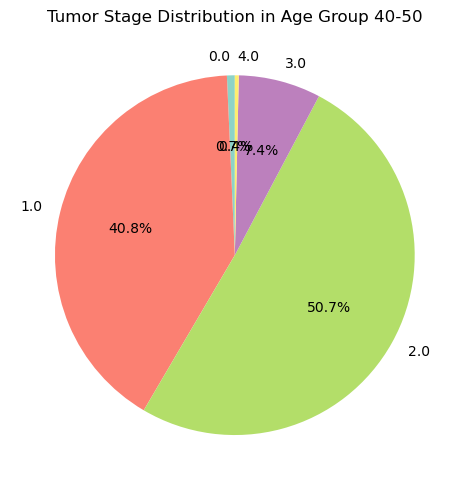

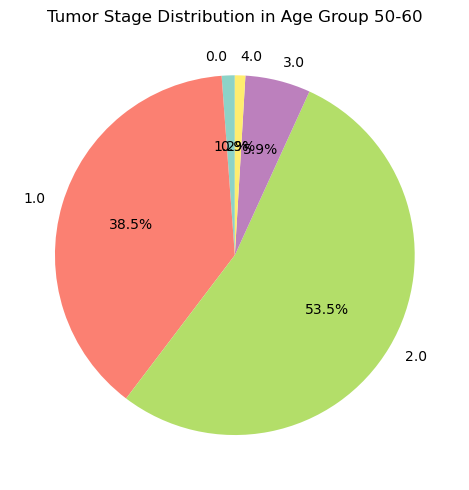

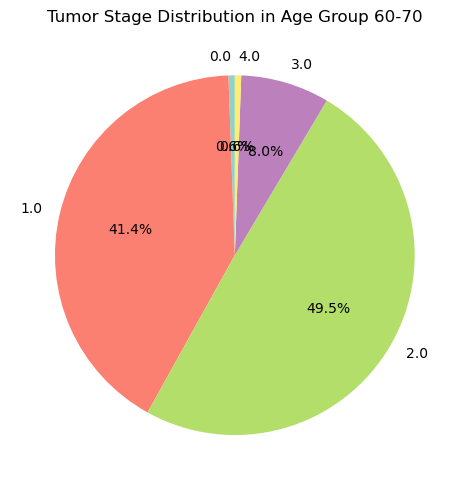

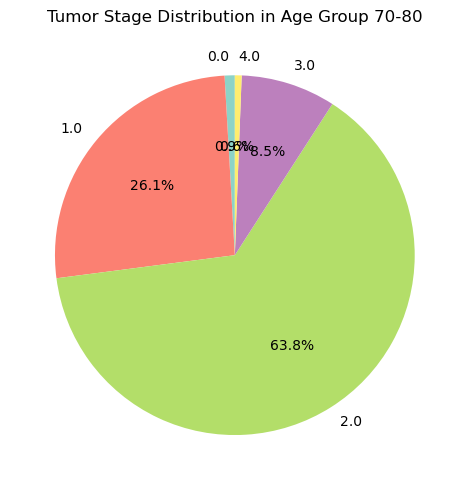

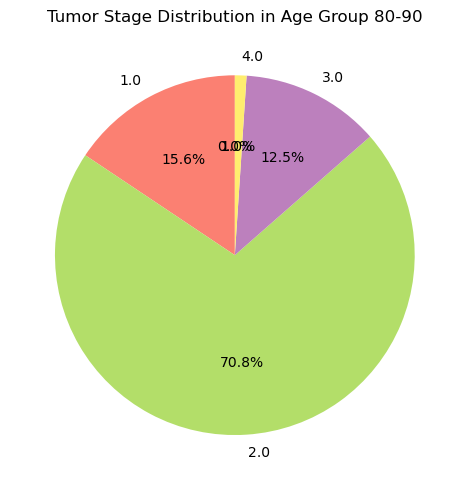

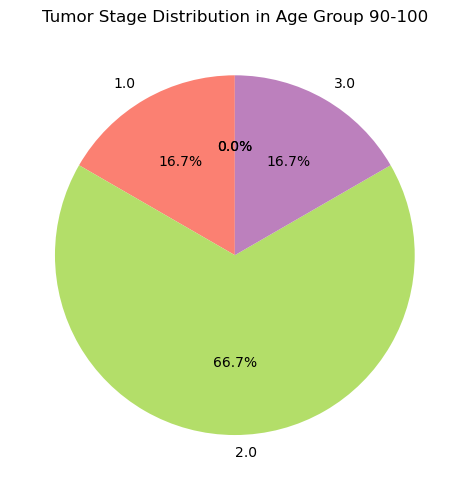

In [14]:
import matplotlib.pyplot as plt
# Preprocess 'Age at Diagnosis'
df['Age at Diagnosis'] = df['Age at Diagnosis'].apply(lambda x: str(x).split(',')[0])
df['Age at Diagnosis'] = pd.to_numeric(df['Age at Diagnosis'], errors='coerce')
df = df.dropna(subset=['Age at Diagnosis', 'Tumor Stage'])

# Define age bins
bins = list(range(20, int(df['Age at Diagnosis'].max()) + 10, 10))
labels = [f"{i}-{i+10}" for i in bins[:-1]]
df['AgeGroup'] = pd.cut(df['Age at Diagnosis'], bins=bins, labels=labels, right=False)

# Group by AgeGroup and Tumor Stage, then count
grouped = df.groupby(['AgeGroup', 'Tumor Stage']).size().unstack(fill_value=0)

# Plot: Stacked Bar Chart
grouped.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title('Tumor Stage Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45)
plt.legend(title='Tumor Stage')
plt.tight_layout()
plt.show()

# Plot: Grouped Bar Chart
grouped.plot(kind='bar', stacked=False, figsize=(12, 6), colormap='Set2')
plt.title('Tumor Stage Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45)
plt.legend(title='Tumor Stage')
plt.tight_layout()
plt.show()


#Seaborn
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(grouped, annot=True, fmt='d', cmap='YlGnBu', linewidths=0.5)
plt.title('Tumor Stage Distribution by Age Group (Heatmap)')
plt.xlabel('Tumor Stage')
plt.ylabel('Age Group')
plt.tight_layout()
plt.show()



age_groups = grouped.index

for age in age_groups:
    plt.figure(figsize=(5, 5))
    grouped.loc[age].plot(kind='pie', autopct='%1.1f%%', startangle=90, colormap='Set3')
    plt.title(f'Tumor Stage Distribution in Age Group {age}')
    plt.ylabel('')
    plt.tight_layout()
    plt.show()


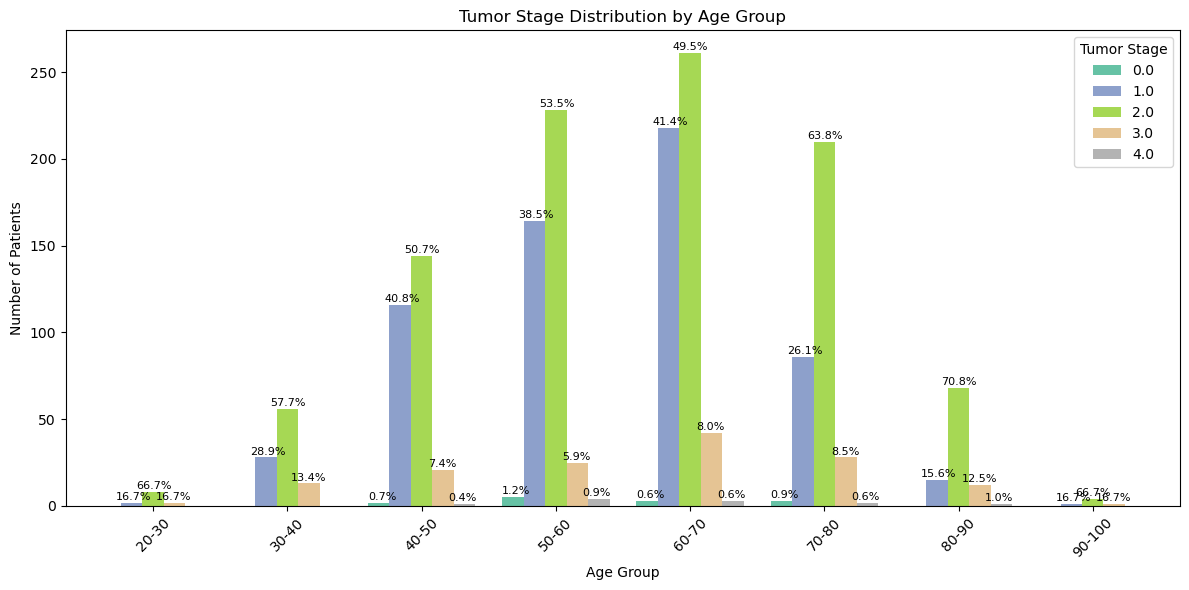

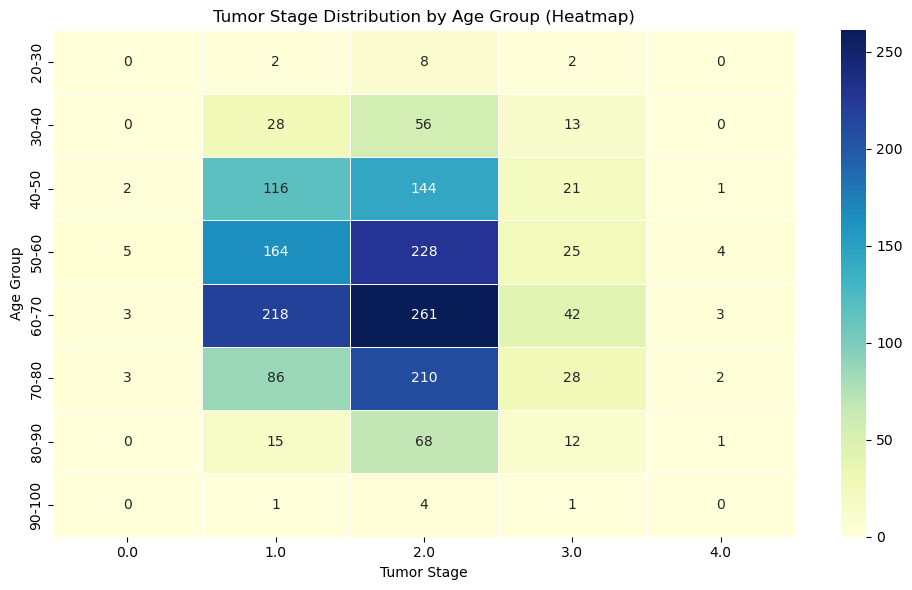

In [15]:
import matplotlib.pyplot as plt
# Preprocess 'Age at Diagnosis'
df['Age at Diagnosis'] = pd.to_numeric(df['Age at Diagnosis'], errors='coerce')
df = df.dropna(subset=['Age at Diagnosis', 'Tumor Stage'])

# Define age bins
bins = list(range(20, int(df['Age at Diagnosis'].max()) + 10, 10))
labels = [f"{i}-{i+10}" for i in bins[:-1]]
df['AgeGroup'] = pd.cut(df['Age at Diagnosis'], bins=bins, labels=labels, right=False)

# Group by AgeGroup and Tumor Stage, then count

# Plot: Grouped Bar Chart with percentages
ax = grouped.plot(kind='bar', stacked=False, figsize=(12, 6), colormap='Set2', width=0.8)
plt.title('Tumor Stage Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45)
plt.legend(title='Tumor Stage')

# Add percentage annotations
for i, age_group in enumerate(grouped.index):
    total = grouped.loc[age_group].sum()
    for j, stage in enumerate(grouped.columns):
        count = grouped.loc[age_group, stage]
        if count > 0:
            percent = (count / total) * 100
            x = i + (j - len(grouped.columns) / 2) * 0.15 + 0.08  # adjust x position for bars
            ax.text(x, count + 0.5, f'{percent:.1f}%', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(grouped, annot=True, fmt='d', cmap='YlGnBu', linewidths=0.5)
plt.title('Tumor Stage Distribution by Age Group (Heatmap)')
plt.xlabel('Tumor Stage')
plt.ylabel('Age Group')
plt.tight_layout()
plt.show()


In [16]:
import pandas as pd
from tabulate import tabulate

# Convert 'Tumor Stage' to integers and get counts
df['Tumor Stage'] = df['Tumor Stage'].astype(int)
stage_counts = df['Tumor Stage'].value_counts().sort_index().reset_index()

# Rename columns for clarity
stage_counts.columns = ['Tumor Stage', 'Count']

# Display the table correctly using tabulate
print(tabulate(stage_counts, headers='keys', tablefmt='pretty', showindex=False))


+-------------+-------+
| Tumor Stage | Count |
+-------------+-------+
|      0      |  13   |
|      1      |  630  |
|      2      |  979  |
|      3      |  144  |
|      4      |  11   |
+-------------+-------+


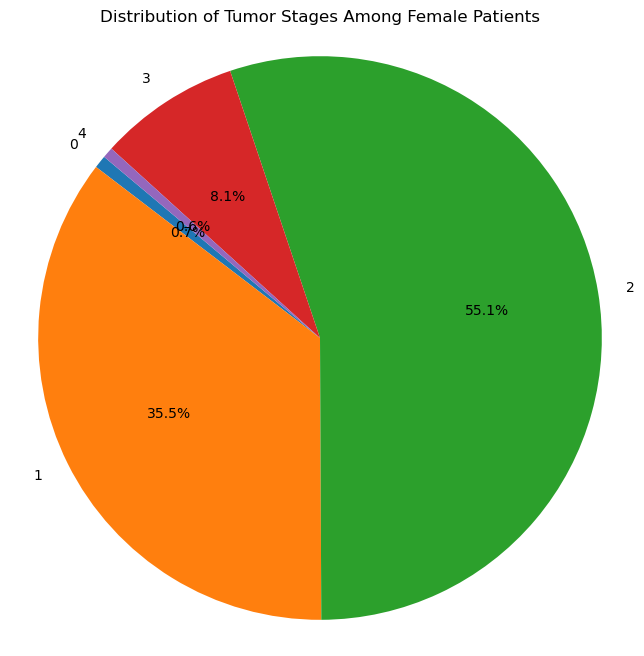

In [18]:
# Filter for female patients and drop rows with missing Tumor Stage
female_df = df[df['Sex'].str.lower() == 'female']
female_df = female_df.dropna(subset=['Tumor Stage'])

# Count occurrences of each tumor stage among females
female_stage_counts = female_df['Tumor Stage'].value_counts().sort_index()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(female_stage_counts, labels=female_stage_counts.index.astype(str), autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Tumor Stages Among Female Patients")
plt.axis('equal')
plt.show()


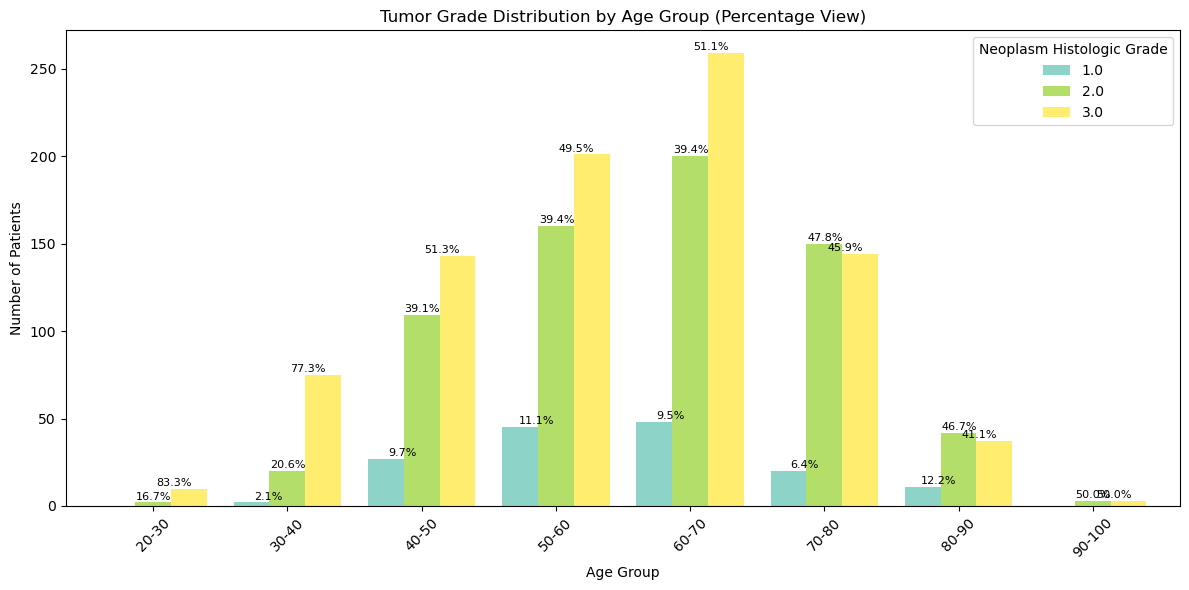

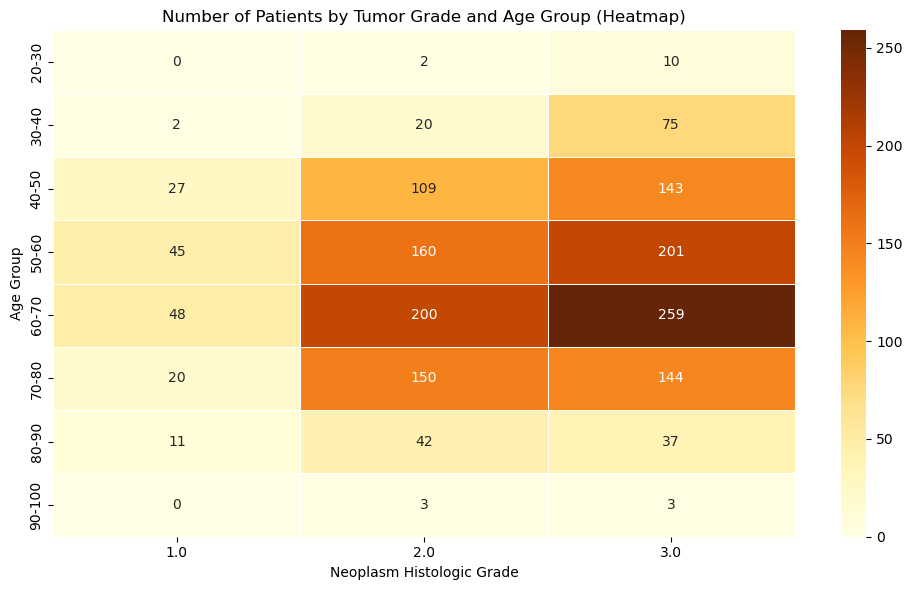

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert Age column and drop NaNs
df['Age at Diagnosis'] = pd.to_numeric(df['Age at Diagnosis'], errors='coerce')
df = df.dropna(subset=['Age at Diagnosis', 'Neoplasm Histologic Grade'])

# Define age bins
bins = list(range(20, int(df['Age at Diagnosis'].max()) + 10, 10))
labels = [f"{i}-{i+10}" for i in bins[:-1]]
df.loc[:, 'AgeGroup'] = pd.cut(df['Age at Diagnosis'], bins=bins, labels=labels, right=False)

# Group by AgeGroup and Grade
grouped_by_grade = df.groupby(['AgeGroup', 'Neoplasm Histologic Grade'], observed=False).size().unstack(fill_value=0)

# Bar plot
ax = grouped_by_grade.plot(kind='bar', stacked=False, figsize=(12, 6), colormap='Set3', width=0.8)
plt.title('Tumor Grade Distribution by Age Group (Percentage View)')
plt.xlabel('Age Group')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45)
plt.legend(title='Neoplasm Histologic Grade')

# Add percentage labels
for i, age_group in enumerate(grouped_by_grade.index):
    total = grouped_by_grade.loc[age_group].sum()
    for j, grade in enumerate(grouped_by_grade.columns):
        count = grouped_by_grade.loc[age_group, grade]
        if count > 0:
            percent = (count / total) * 100
            # Calculate the x position to center the text above the bar
            x = i + (j - len(grouped_by_grade.columns) / 2) * 0.15 + 0.08   # Adjust width for better centering
            # Adjust the y position to place the text slightly above the center of the bar
            ax.text(x, count + 0.5, f'{percent:.1f}%', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()






# Heatmap using count
plt.figure(figsize=(10, 6))
sns.heatmap(grouped_by_grade, annot=True, fmt='d', cmap='YlOrBr', linewidths=0.5)
plt.title('Number of Patients by Tumor Grade and Age Group (Heatmap)')
plt.xlabel('Neoplasm Histologic Grade')
plt.ylabel('Age Group')
plt.tight_layout()
plt.show()
